In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
b = pd.read_csv('f_input.csv')

In [151]:
b = pd.read_csv('Catastrophic/f_input.csv')

In [166]:
out = pd.read_csv('out_photoz.dat')

In [169]:
out = out.iloc[0:8,:]

In [172]:
b

,zbin1,zbin2,meanz,CORmeanz,fout,CORfout,CORoutbias,err_CORoutbias,CORb,err_CORb,CORs,err_CORs,CORIQRs,CORIQRb,err_CORIQRs,err_CORIQRb
0,0.00,0.30,0.2224,0.2241,0.0667,0.0442,0.1307,0.0121,0.0057,0.0008,0.0409,0.0026,0.0151,0.0005,0.0005,0.0003
1,0.15,0.45,0.3253,0.3259,0.0588,0.0533,0.0697,0.0060,0.0040,0.0005,0.0338,0.0011,0.0177,0.0010,0.0004,0.0003
2,0.30,0.60,0.4533,0.4533,0.0611,0.0608,-0.0382,0.0050,-0.0034,0.0004,0.0332,0.0007,0.0165,-0.0013,0.0003,0.0002
3,0.45,0.75,0.5987,0.5987,0.0325,0.0325,-0.1047,0.0048,-0.0048,0.0003,0.0267,0.0008,0.0117,-0.0015,0.0002,0.0002
4,0.60,0.90,0.7470,0.7470,0.0048,0.0048,0.0219,0.0117,-0.0004,0.0002,0.0163,0.0002,0.0121,-0.0006,0.0002,0.0002
5,0.75,1.05,0.8875,0.8875,0.0092,0.0092,0.1255,0.0245,0.0001,0.0003,0.0265,0.0018,0.0131,-0.0009,0.0002,0.0002
6,0.90,1.20,1.0389,1.0389,0.0250,0.0250,0.1108,0.0139,0.0031,0.0005,0.0336,0.0021,0.0132,0.0002,0.0003,0.0002
7,1.05,1.35,1.1932,1.1932,0.0424,0.0424,0.0510,0.0094,0.0025,0.0005,0.0345,0.0021,0.0183,0.0005,0.0004,0.0003


In [177]:
z_true = b.zbin1 + (b.zbin2-b.zbin1)/2.

In [178]:
z_true

0    0.15
1    0.30
2    0.45
3    0.60
4    0.75
5    0.90
6    1.05
7    1.20
dtype: float64

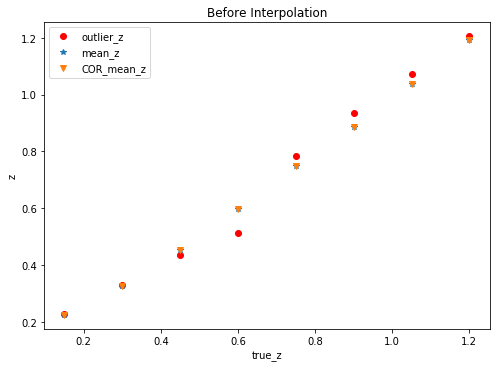

In [196]:
plt.plot(z_true, out,'o',c='r',label='outlier_z')
plt.plot(z_true, b.meanz,'*',label='mean_z')
plt.plot(z_true, b.CORmeanz,'v',label='COR_mean_z')
plt.xlabel('true_z');plt.ylabel('z')
plt.legend()
plt.tight_layout()
plt.title('Before Interpolation')
plt.savefig('NEW_LSST/compare-1.pdf',bbox_inches='tight')

In [188]:
out

,out_photoz
0,0.228474
1,0.329221
2,0.435428
3,0.513386
4,0.784457
5,0.933698
6,1.071473
7,1.205248


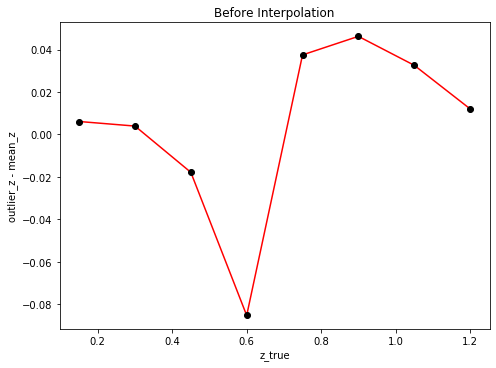

In [199]:
plt.plot(z_true, out.out_photoz-b.meanz,c='r')
plt.plot(z_true, out.out_photoz-b.meanz,'o',c='black')
plt.xlabel('z_true');plt.ylabel('outlier_z - mean_z')
plt.tight_layout()
plt.title('Before Interpolation')
plt.savefig('NEW_LSST/compare-2.pdf',bbox_inches='tight')

In [154]:
np.mean(b.meanz)

0.683575

In [86]:
np.mean(b.CORmeanz)

0.683825

Text(0, 0.5, 'z')

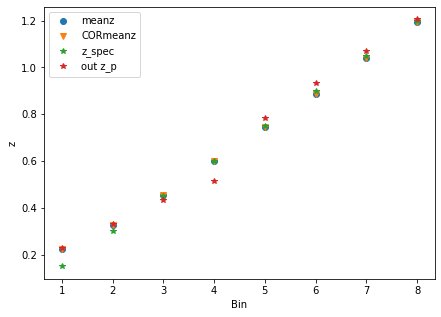

In [232]:
#plt.subplot(2,1,1)
#plt.rcParams['figure.figsize'] = [7, 5]
plt.plot(np.linspace(1,8,8),b.meanz,'o',label='meanz')
plt.plot(np.linspace(1,8,8),b.CORmeanz,'v',label='CORmeanz')
#plt.plot(np.linspace(1,8,8),b.CORoutbias,'v',label='CORoutlier_bias')
plt.plot(np.linspace(1,8,8),z_true,'*',label='z_spec')
plt.plot(np.linspace(1,8,8),out,'*',label='out z_p')
plt.legend()
plt.xlabel('Bin')
plt.ylabel('z')

Text(0, 0.5, '$z\\left(\\frac{|COR\\_mean-mean|}{mean}\\right)*100$')

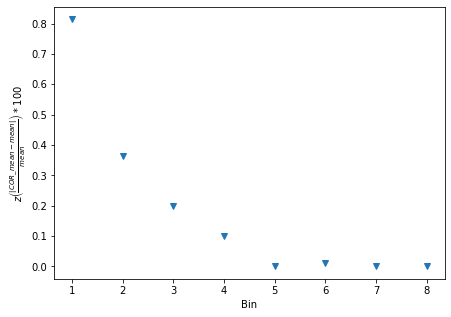

In [101]:
plt.plot(np.linspace(1,8,8),abs(b.CORmeanz-b.meanz)*100/b.meanz,'v')
plt.xlabel('Bin')
plt.ylabel(r'$z\left(\frac{|COR\_mean-mean|}{mean}\right)*100$')

In [54]:
np.median(b.CORb)/np.median(b.err_CORb)

5.3

In [55]:
np.median(b.CORb/b.err_CORb)

5.75

In [159]:
yy = np.median(b.CORoutbias/b.err_CORoutbias)
print(round(yy))

5.0


In [12]:
!pwd

/Volumes/HDD Data 750GB/Programs/Fisher/github


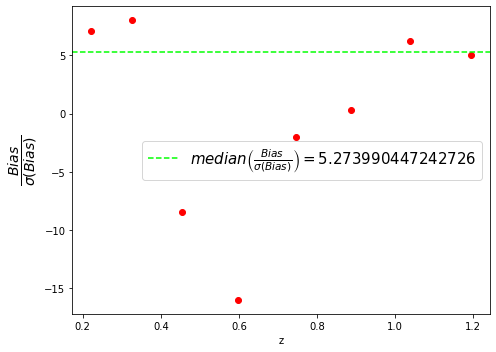

In [160]:
plt.plot(b.meanz,(b.CORb/b.err_CORb),'o',c='r')
plt.axhline(np.median(b.CORoutbias/b.err_CORoutbias),linestyle='--',c='lime',label=r'$median\left(\frac{Bias}{\sigma (Bias)}\right) = %s$'%yy)
plt.ylabel(r'$\frac{Bias}{\sigma (Bias)}$',size=20)
plt.xlabel('z')
plt.legend(prop={'size': 15})
plt.tight_layout()
#plt.savefig('Scale_factor.pdf',bbox_inches='tight')

In [14]:
#b.to_csv('melissa.csv',sep = ' ',index=False)

Text(0, 0.5, 'Mean Redshift (z)')

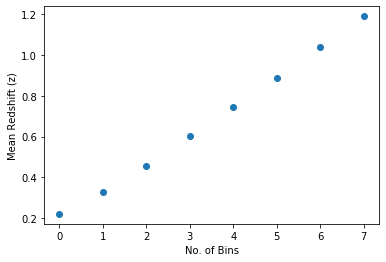

In [58]:
plt.plot(b.meanz, 'o')
plt.xlabel('No. of Bins');plt.ylabel('Mean Redshift (z)')

In [108]:
b.head(3)

,zbin1,zbin2,meanz,CORmeanz,fout,CORb,err_CORb,CORs,err_CORs,CORIQRs,CORIQRb,err_CORIQRs,err_CORIQRb
0,0.00,0.30,0.2212,0.2230,0.1980,0.0260,0.0015,0.0688,0.0025,0.0229,0.0064,0.0007,0.0006
1,0.15,0.45,0.3289,0.3301,0.1672,0.0154,0.0008,0.0536,0.0012,0.0247,0.0055,0.0005,0.0004
2,0.30,0.60,0.4535,0.4544,0.1312,-0.0004,0.0005,0.0434,0.0008,0.0213,0.0014,0.0004,0.0003


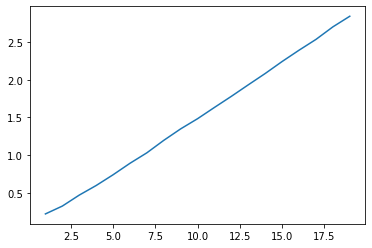

In [17]:
plt.plot(np.linspace(1,19,19), a.meanz )

In [109]:
c = b.iloc[: , [3,10]]

In [112]:
c.head(1)

,CORmeanz,CORIQRb
0,0.223,0.0064


In [19]:
#c.to_csv('meliisa_reduced_bias.csv',sep = ' ')

In [113]:
c.columns = ['meanz','CORIQRb']

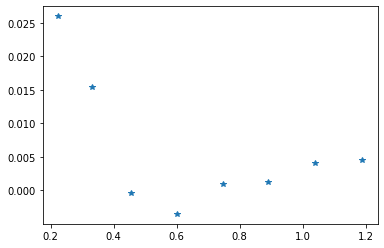

In [65]:
plt.plot(c.meanz, c.CORIQRb, '*')

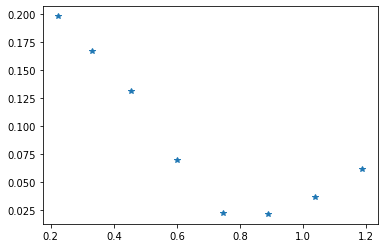

In [67]:
plt.plot(b.CORmeanz, b.fout, '*')

In [23]:
from scipy.interpolate import interp1d

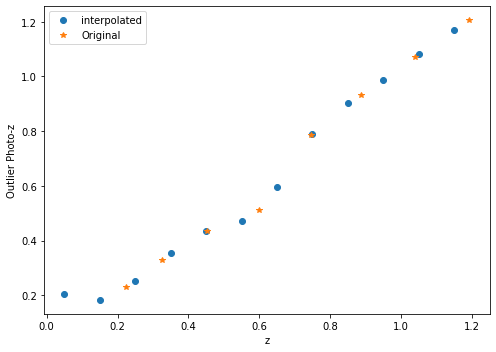

In [208]:
f2 = interp1d(b.CORmeanz, c.CORIQRb, kind='nearest',fill_value="extrapolate") # nearest
##f2 = interp1d(b.meanz, b.err_CORIQRb, kind='nearest',fill_value="extrapolate") # cubic
f3 = interp1d(b.CORmeanz, b.err_CORIQRb, kind='nearest',fill_value="extrapolate") # cubic
f4 = interp1d(b.CORmeanz, b.CORfout, kind='cubic',fill_value="extrapolate") # cubic
f5 = interp1d(b.CORmeanz, out.out_photoz, kind='cubic',fill_value="extrapolate") # cubic
f6 = interp1d(b.CORmeanz, b.CORoutbias, kind='cubic',fill_value="extrapolate") # cubic

xnew = np.linspace(0.05,1.15,12, endpoint=True)
#np.linspace(0.05,1.15,12)

plt.plot(xnew,f5(xnew),'o', label = 'interpolated')
#plt.plot(c.meanz, c.CORIQRb, '*', label = 'Original')
#plt.plot(b.CORmeanz, b.err_CORIQRb, '*', label = 'Original')
#plt.plot(b.CORmeanz, b.CORfout, '*', label = 'Original')
plt.plot(b.CORmeanz, out.out_photoz, '*', label = 'Original')
plt.xlabel('z')
plt.ylabel('Robust bias(error) "CORIQRb" ' )
plt.ylabel('Fraction of Outlier')
plt.ylabel('Outlier Photo-z')

plt.legend()
plt.tight_layout()
#plt.savefig('Outlier_f.pdf',bbox_inches='tight')

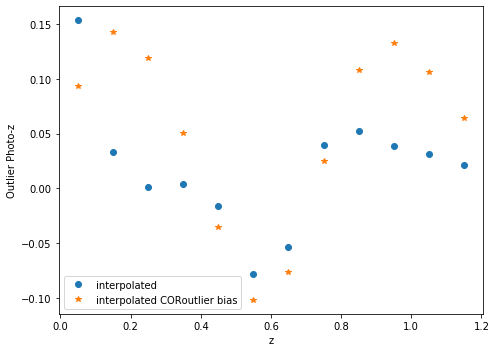

In [220]:
plt.plot(xnew,f5(xnew)-xnew,'o', label = 'interpolated')
plt.plot(xnew,f6(xnew),'*', label = 'interpolated CORoutlier bias')
#plt.plot(c.meanz, c.CORIQRb, '*', label = 'Original')
#plt.plot(b.CORmeanz, b.err_CORIQRb, '*', label = 'Original')
#plt.plot(b.CORmeanz, b.CORfout, '*', label = 'Original')
#plt.plot(b.CORmeanz, out.out_photoz, '*', label = 'Original')
plt.xlabel('z')
plt.ylabel('Robust bias(error) "CORIQRb" ' )
plt.ylabel('Fraction of Outlier')
plt.ylabel('Outlier Photo-z')

plt.legend()
plt.tight_layout()

In [25]:
xnew

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15])

In [26]:
f2(xnew)

array([0.0066, 0.0066, 0.0066, 0.0066, 0.0017, 0.0003, 0.0003, 0.0006,
       0.0003, 0.0003, 0.0009, 0.001 ])

In [27]:
f3(xnew)

array([0.0002, 0.0002, 0.0002, 0.0002, 0.0001, 0.0001, 0.0001, 0.0001,
       0.0001, 0.0001, 0.0001, 0.0002])

In [28]:
y4 = np.median(f2(xnew)/f3(xnew))

In [29]:
xnew

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05,
       1.15])

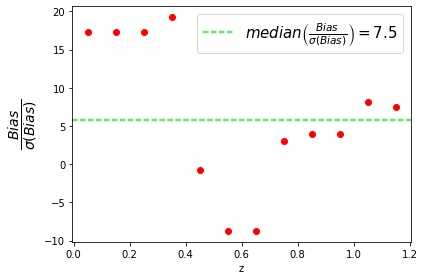

In [70]:
plt.plot(xnew,f2(xnew)/f3(xnew),'o',c='r')
plt.axhline(np.median(f2(xnew)/f3(xnew)),linestyle='--',c='lime',label=r'$median\left(\frac{Bias}{\sigma (Bias)}\right) = %s$'%y4)
plt.ylabel(r'$\frac{Bias}{\sigma (Bias)}$',size=20)
plt.xlabel('z')
plt.legend(prop={'size': 15})
plt.tight_layout()
#plt.savefig('Scale_factorII.pdf',bbox_inches='tight')

In [227]:
inter2 = np.array(list(zip(xnew,f5(xnew),f6(xnew),f4(xnew)))) # f4 = outlier fraction
d2 = pd.DataFrame(inter2, columns=['z_true','z_photo','outlier_bias','F'])
#d2.to_csv('interpolated_fout_new.csv',sep = ' ',index = False)

In [234]:
d2

,z_true,z_photo,outlier_bias,F
0,0.05,0.203506,0.093116,0.091933
1,0.15,0.183006,0.142650,0.050062
2,0.25,0.251730,0.119162,0.045339
3,0.35,0.353920,0.050524,0.056178
4,0.45,0.433815,-0.035392,0.060993
5,0.55,0.471496,-0.101744,0.044635
6,0.65,0.596429,-0.076595,0.020190
7,0.75,0.789309,0.025034,0.004586
8,0.85,0.902699,0.108485,0.006027
9,0.95,0.988488,0.132778,0.015328


In [163]:
inter = np.array(list(zip(xnew,f4(xnew)))) # f4 = outlier fraction

In [164]:
d = pd.DataFrame(inter, columns=['z','bias'])

In [149]:
d.to_csv('interpolated_error_new.csv',sep = ' ',index = False)
#d.to_csv('interpolated_new_2.csv',sep=' ',index=False)
#d.to_csv('interpolated_fout.csv',sep = ' ',index = False)

In [233]:
d

,z,bias
0,0.05,0.091933
1,0.15,0.050062
2,0.25,0.045339
3,0.35,0.056178
4,0.45,0.060993
5,0.55,0.044635
6,0.65,0.020190
7,0.75,0.004586
8,0.85,0.006027
9,0.95,0.015328


### Estimating the z' for outliers from the figure 5a, by estimting a median for each z slice

In [35]:
from random import randint,  uniform

In [36]:
x00 = 2.51
# 0.15
# For bin z = [0.05-0.15]
# roughly 15% points on the left side and ~ 75% on right side
x_left = [uniform(0.25, 0.65) for p in range(0, 15)]
x_right = [uniform(2.0, 3.0) for p in range(0, 70)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x1 = np.median(x)
print('Median z for  z[0.05-0.15] = ',x1)

# 0.25
# For bin z = [0.15-0.25]

x_left = [uniform(0.25, 0.65) for p in range(0, 115)]
x_right = [uniform(2.1, 3.0) for p in range(0, 100)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x2 = np.median(x)
print('Median z for  z[0.15-0.25] = ',x2)

# 0.35
# For bin z = [0.25-0.35]

x_left = [uniform(0.33, 0.6) for p in range(0, 115)]
x_right = [uniform(2.3, 3.0) for p in range(0, 100)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x3 = np.median(x)
print('Median z for  z[0.25-0.35] = ',x3)

# 0.45
# For bin z = [0.35-0.45]

x_left = [uniform(0.3, 0.65) for p in range(0, 500)]
x_right = [uniform(2.3, 3.0) for p in range(0, 100)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x4 = np.median(x)
print('Median z for  z[0.35-0.45] = ',x4)

# 0.55
# For bin z = [0.45-0.55]

x_left = [uniform(0.3, 0.98) for p in range(0, 1000)]
x_right = [uniform(2.25, 2.98) for p in range(0, 70)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x5 = np.median(x)
print('Median z for  z[0.45-0.55] = ',x5)

# 0.65
# For bin z = [0.55-0.65]
x_left = [uniform(0.4, 0.95) for p in range(0, 1000)]
x_right = [uniform(1.6, 2.99) for p in range(0, 30)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x6 = np.median(x)
print('Median z for  z[0545-0.65] = ',x6)

# 0.75
# For bin z = [0.65-0.75]
x_left = [uniform(0.5, 0.97) for p in range(0, 1000)]
x_right = [uniform(2.0, 2.99) for p in range(0, 30)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x7 = np.median(x)
print('Median z for  z[0.65-0.75] = ',x7)

# 0.85
# For bin z = [0.75-0.85]

x_left = [uniform(0.3, 1.3) for p in range(0, 1000)]
x_right = [uniform(1.3, 2.99) for p in range(0, 30)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x8 = np.median(x)
print('Median z for  z[0.75-0.85] = ',x8)

# 0.95
# For bin z = [0.85-0.95]

x_left = [uniform(0.6, 1.7) for p in range(0, 800)]
x_right = [uniform(1.7, 2.99) for p in range(0, 15)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x9 = np.median(x)
print('Median z for  z[0.85-0.95] = ',x9)

# 1.05
# For bin z = [0.95-1.05]

x_left = [uniform(0.75, 2.0) for p in range(0, 900)]
x_right = [uniform(2.0, 2.5) for p in range(0, 5)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x10 = np.median(x)
print('Median z for  z[0.95-1.05] = ',x10)

# 1.15
# For bin z = [1.05-1.15]

x_left = [uniform(0.9, 2.25) for p in range(0, 900)]
x_right = [uniform(2.25, 2.35) for p in range(0, 2)]
x = np.concatenate([x_left,x_right])
#print(np.shape(x))
x11 = np.median(x)
print('Median z for  z[1.05-1.15] = ',x11)

Median z for  z[0.05-0.15] =  2.364880635490321
Median z for  z[0.15-0.25] =  0.6014331710753977
Median z for  z[0.25-0.35] =  0.5822839426184279
Median z for  z[0.35-0.45] =  0.5029403316548645
Median z for  z[0.45-0.55] =  0.6623966247838058
Median z for  z[0545-0.65] =  0.6803974408744055
Median z for  z[0.65-0.75] =  0.742210688545553
Median z for  z[0.75-0.85] =  0.816492801994408
Median z for  z[0.85-0.95] =  1.1783498119502083
Median z for  z[0.95-1.05] =  1.3610707231049979
Median z for  z[1.05-1.15] =  1.5656012254287284


In [37]:
x_t = [x00,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]

In [38]:
x_t

[2.51,
 2.364880635490321,
 0.6014331710753977,
 0.5822839426184279,
 0.5029403316548645,
 0.6623966247838058,
 0.6803974408744055,
 0.742210688545553,
 0.816492801994408,
 1.1783498119502083,
 1.3610707231049979,
 1.5656012254287284]

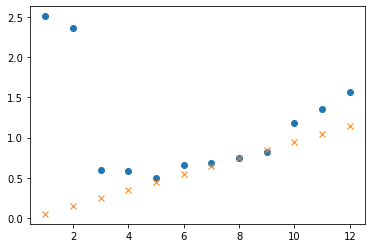

In [39]:
plt.plot(np.linspace(1,12,12),x_t,'o')
plt.plot(np.linspace(1,12,12),np.linspace(0.05,1.15,12),'x')

In [40]:
catash = np.array(list(zip(np.linspace(0.05,1.15,12),x_t,d.bias)))

In [41]:
catash

array([[5.00000000e-02, 2.51000000e+00, 6.60000000e-03],
       [1.50000000e-01, 2.36488064e+00, 6.60000000e-03],
       [2.50000000e-01, 6.01433171e-01, 6.60000000e-03],
       [3.50000000e-01, 5.82283943e-01, 6.60000000e-03],
       [4.50000000e-01, 5.02940332e-01, 1.70000000e-03],
       [5.50000000e-01, 6.62396625e-01, 3.00000000e-04],
       [6.50000000e-01, 6.80397441e-01, 3.00000000e-04],
       [7.50000000e-01, 7.42210689e-01, 6.00000000e-04],
       [8.50000000e-01, 8.16492802e-01, 3.00000000e-04],
       [9.50000000e-01, 1.17834981e+00, 3.00000000e-04],
       [1.05000000e+00, 1.36107072e+00, 9.00000000e-04],
       [1.15000000e+00, 1.56560123e+00, 1.00000000e-03]])

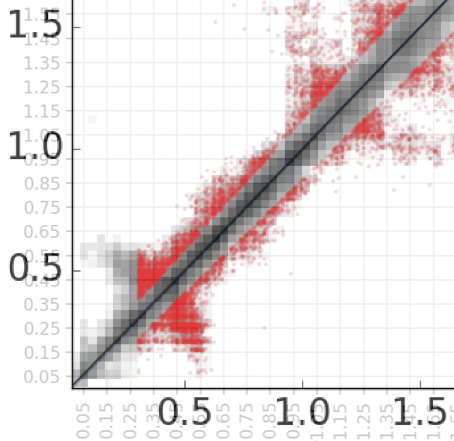

In [42]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("Catastrophic/superposed2.jpg")

In [72]:
catash = pd.DataFrame(catash,columns=['z_true','z_photo','F'])
#catash.to_csv('Catastrophic/f2.csv',index = False)

In [73]:
catash.z_photo[0] = 0.09 # bin 0.05 [0 - 0.1] ??? What to do here
catash.z_photo[1] = 0.40 # 0.15
catash.z_photo[2] = 0.45 # 0.25
catash.z_photo[3] = 0.48 # 0.35
catash.z_photo[4] = 0.38 # 0.45
catash.z_photo[5] = 0.50 # 0.55
catash.z_photo[6] = 0.60 # 0.65
catash.z_photo[7] = 0.65 # 0.75
catash.z_photo[8] = 0.95 # 0.85
catash.z_photo[9] = 1.10 # 0.95
catash.z_photo[10]= 1.21 # 1.05, 
catash.z_photo[11]= 1.25 # 1.15

In [74]:
catash.z_photo

0     0.09
1     0.40
2     0.45
3     0.48
4     0.38
5     0.50
6     0.60
7     0.65
8     0.95
9     1.10
10    1.21
11    1.25
Name: z_photo, dtype: float64

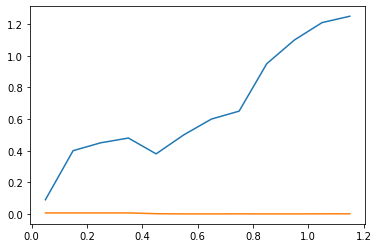

In [75]:
plt.plot(catash.z_true,catash.z_photo)
plt.plot(catash.z_true,catash.F)

In [ ]:
catash